In [2]:
import os
import pandas as pd

plotDir = os.path.join(os.path.dirname(os.getcwd()), 'plots')
print(plotDir)

# Load the data
df = pd.read_csv('BS_table.csv')
# only keep rows with 'SV' in 'Var1'
df = df[df['Var1'].str.contains('SV')]
# print(df.head())

c:\Users\ailen\Desktop\GitHub\blindspot-multisensory\plots


In [3]:
# Create new dataframe for violin plot
df_violin = pd.DataFrame(columns=['deg', 'class', 'Eye'])

df_left = pd.melt(df, value_vars=['Horizontal distance', 'Vertical distance', 'Width', 'Height', 'Area'], var_name='class', value_name='deg')
df_left['Eye'] = 'Left'
df_right = pd.melt(df, value_vars=['Right_Horizontal distance', 'Right_Vertical distance', 'Right_Width', 'Right_Height', 'Right_Area'], var_name='class', value_name='deg')
df_right['Eye'] = 'Right'
# remove 'Right_'
df_right['class'] = df_right['class'].str.replace('Right_', '')

# combine the two dataframes
df_violin = pd.concat([df_left, df_right])
df_violin['class'] = df_violin['class'].str.replace('Horizontal distance', 'Distance from\nvertical meridian')
df_violin['class'] = df_violin['class'].str.replace('Vertical distance', 'Distance from\nhorizontal meridian')

# print(df_violin)

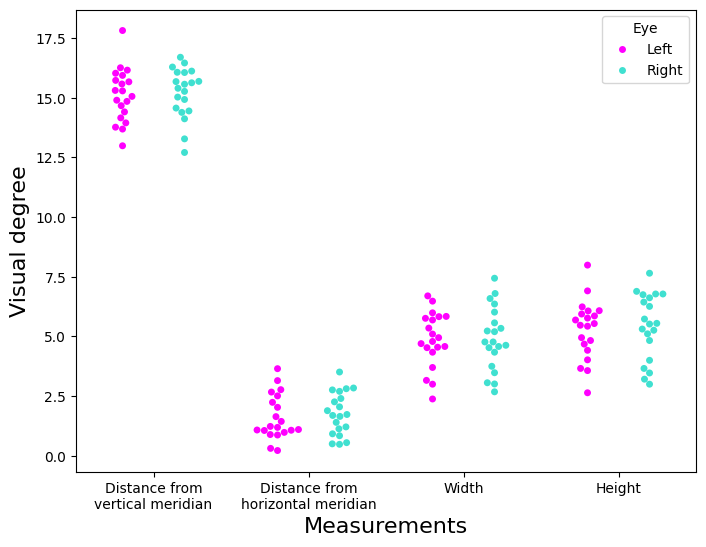

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# remove rows with 'Area' in 'class'
df_violin = df_violin[~df_violin['class'].str.contains('Area')]
# sns.violinplot(
#     data=df_violin, x='class', y='deg', hue='Eye', 
#     split=True, palette={'Left': 'magenta', 'Right': 'turquoise'}
#     )
sns.swarmplot(
    data=df_violin, x='class', y='deg', hue='Eye', 
    dodge=True, palette={'Left': 'magenta', 'Right': 'turquoise'}
    )

# plt.title('Blind Spot Measurements (N=20)')
plt.xlabel('Measurements', fontsize=16)
plt.ylabel('Visual degree', fontsize=16)

plt.savefig(os.path.join(plotDir, 'fig_s1_bs.png'))
plt.show()

In [5]:
df['Combined_Area'] = (df['Area'] + df['Right_Area'])/2
combined_mean = df['Combined_Area'].mean()
combined_std = df['Combined_Area'].std()
print(f"Combined mean area of blind spots: {combined_mean:.2f}")
print(f"Combined std area of blind spots: {combined_std:.2f}")

Combined mean area of blind spots: 21.55
Combined std area of blind spots: 8.99


In [6]:
df['Combined_Horizontal distance'] = (df['Horizontal distance'] + df['Right_Horizontal distance'])/2
combined_mean = df['Combined_Horizontal distance'].mean()
combined_std = df['Combined_Horizontal distance'].std()
print(f"Combined mean horizontal distance of blind spots: {combined_mean:.2f}")
print(f"Combined std horizontal distance of blind spots: {combined_std:.2f}")

df['combined_Vertical distance'] = (df['Vertical distance'] + df['Right_Vertical distance'])/2
combined_mean = df['combined_Vertical distance'].mean()
combined_std = df['combined_Vertical distance'].std()
print(f"Combined mean vertical distance of blind spots: {combined_mean:.2f}")
print(f"Combined std vertical distance of blind spots: {combined_std:.2f}")


Combined mean horizontal distance of blind spots: 15.17
Combined std horizontal distance of blind spots: 0.98
Combined mean vertical distance of blind spots: 1.69
Combined std vertical distance of blind spots: 0.78
